# Logistic Regression with [Breast Cancer Wisconsin Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Data 

In [9]:
df_data = pd.read_csv('data.csv')

In [10]:
df_data.tail(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [11]:
df_data.shape

(569, 33)

In [12]:
df_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
##we have 33 columns and only one categorical variable 
df_data.select_dtypes(exclude=["number"])

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


## Missing Data

In [14]:
df_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [15]:
## we will drop unamed column 32 and  id column 
df_data.drop(['id', 'Unnamed: 32'],axis=1,inplace=True)

In [16]:
##apparently there is no null data in all other columns but in case 
df_data.dropna(inplace=True)

In [17]:
#We check again
df_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [18]:
### now see how many rows and columns  we have
df_data.shape


(569, 31)

### categorical to numerical for diagnosis column (depenendet variable) 


In [19]:
df_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [20]:

df_data['diagnosis'].replace(to_replace='M', value = 1, inplace=True)
df_data['diagnosis'].replace(to_replace='B', value = 0, inplace=True)

In [150]:
###now we check de replacement
df_data_processing = df_data.copy()
df_data_processing.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Correlation analsys

<Axes: >

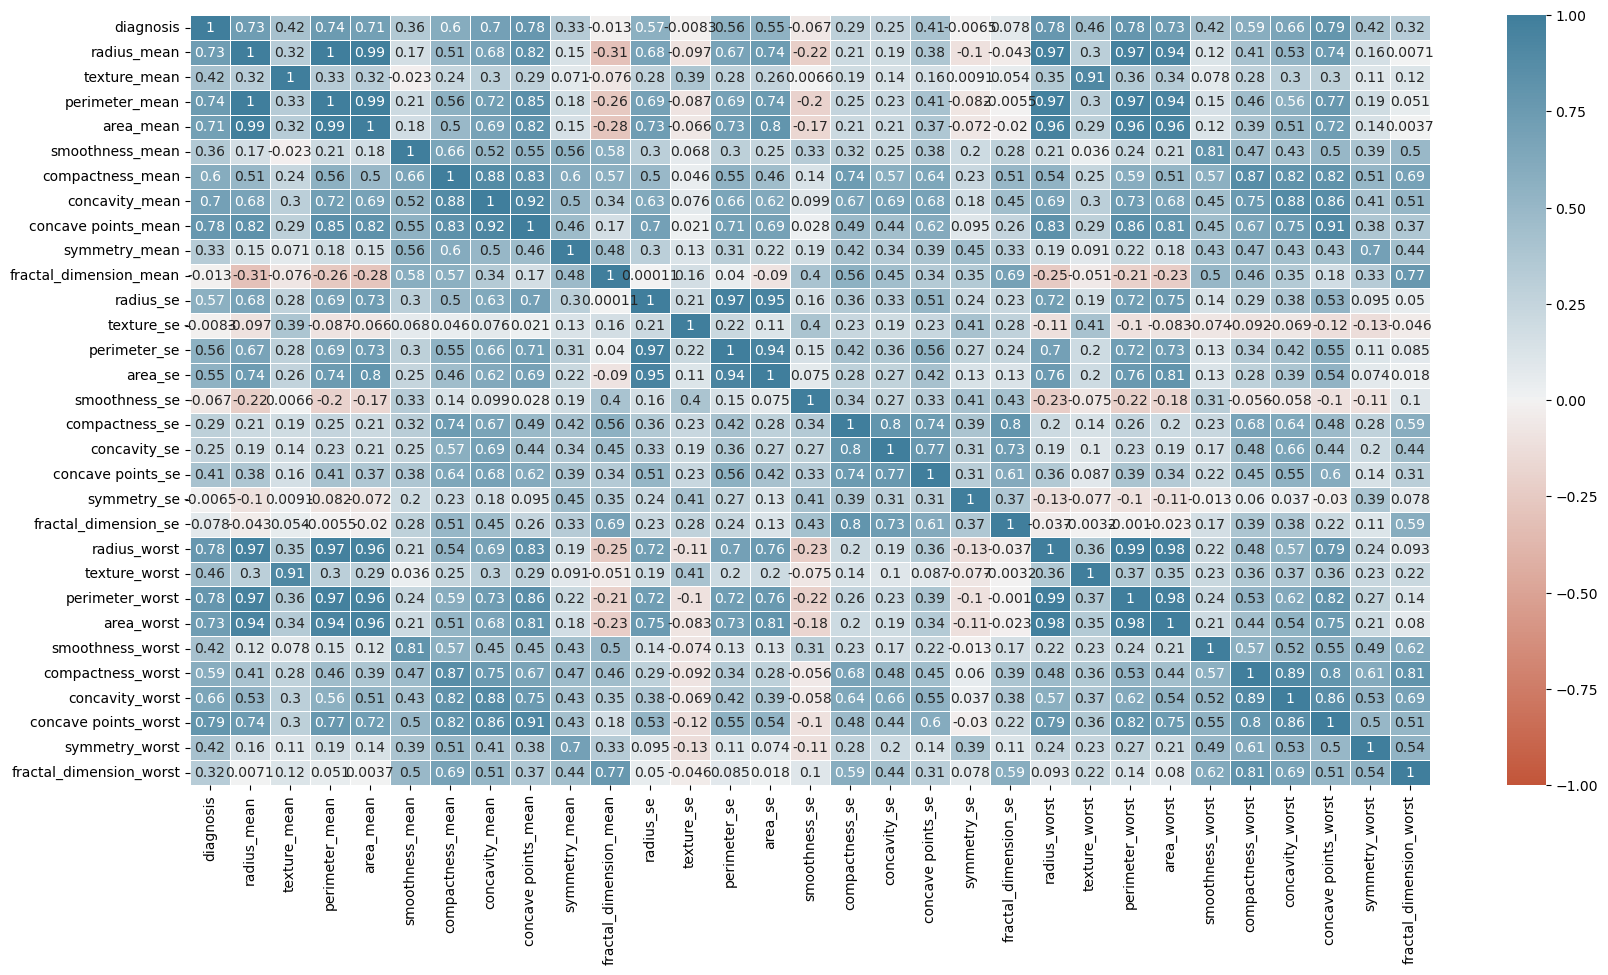

In [22]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(
    data=df_data_processing.corr(),
    cmap= sns.diverging_palette(20,230, as_cmap=True), ##para establecer unos colores del heatmap
    center=0,
    vmin=-1, ##valor minimo de correlacion
    vmax=1,##valor maximo de correlacion 
    linewidths=0.5, 
    annot=True)

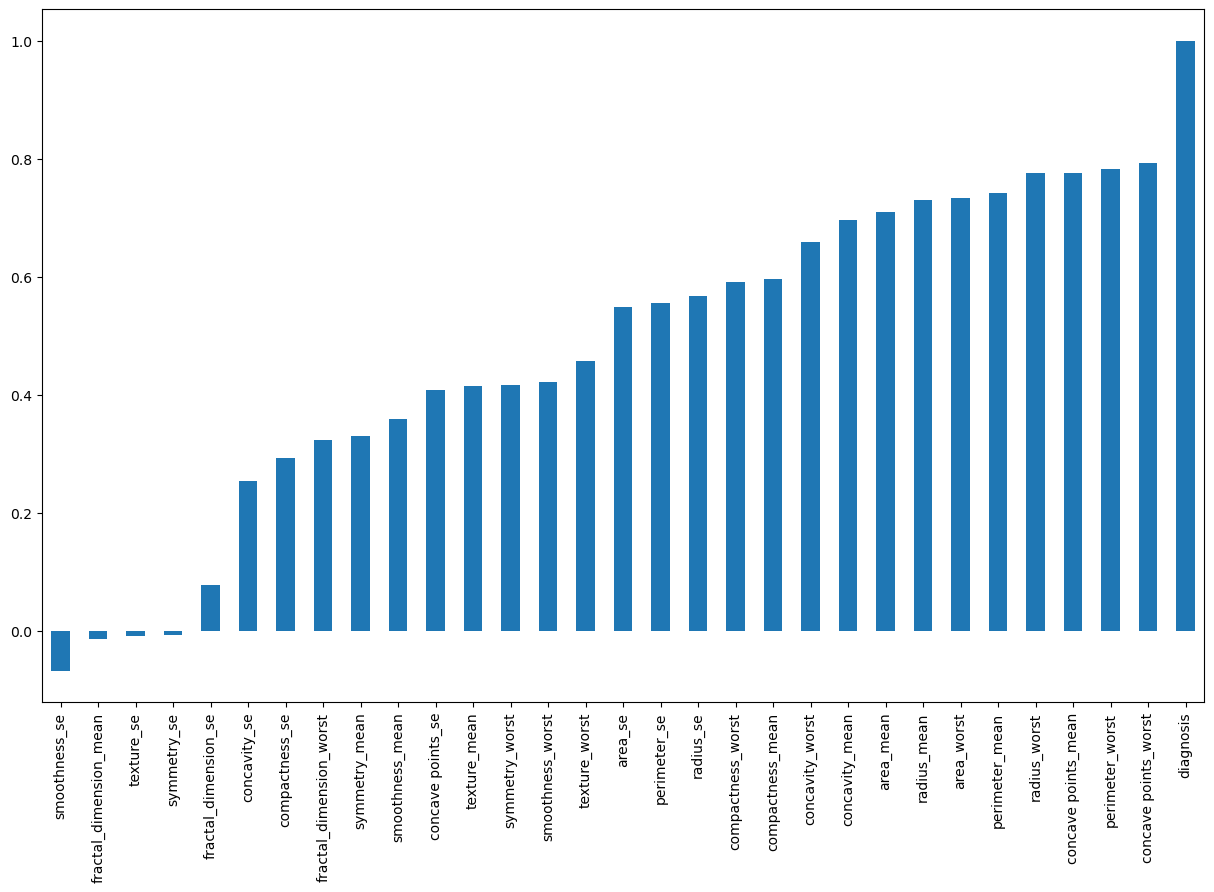

In [151]:
# we'll see wich ones are more corrlated with diagnosis
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()


In [146]:
# the _worst and _se variableis are  high correlated with _mean so we are going to exclud them   

exlcude=df_data_processing.filter(regex='worst$',axis=1).columns.tolist()
exlcude_2=df_data_processing.filter(regex='se$',axis=1).columns.tolist()
df_data_processing.drop(exlcude, axis=1, inplace=True)
df_data_processing.drop(exlcude_2, axis=1, inplace=True)
df_data_processing

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


<Axes: >

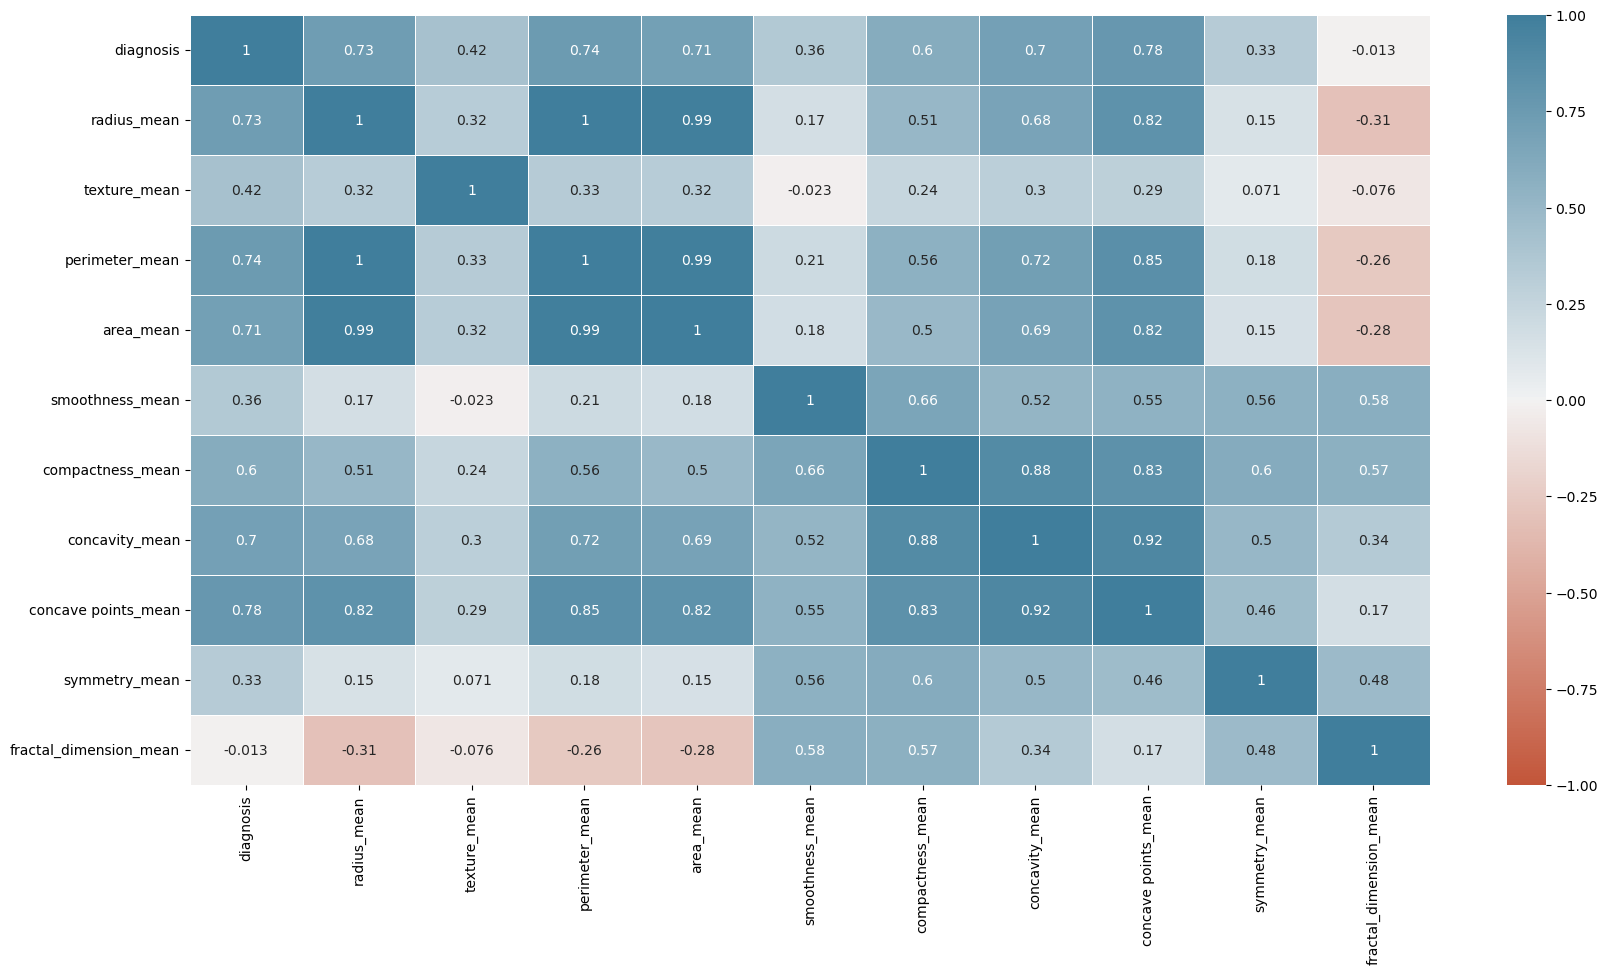

In [147]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(
    data=df_data_processing.corr(),
    cmap= sns.diverging_palette(20,230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5, 
    annot=True)

In [152]:
#becouse radius_mean','perimeter_mean are very correlated with other fetures 
##we will dop them 
df_data_processing.drop(['radius_mean','perimeter_mean'],axis=1, inplace=True)
df_data_processing

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

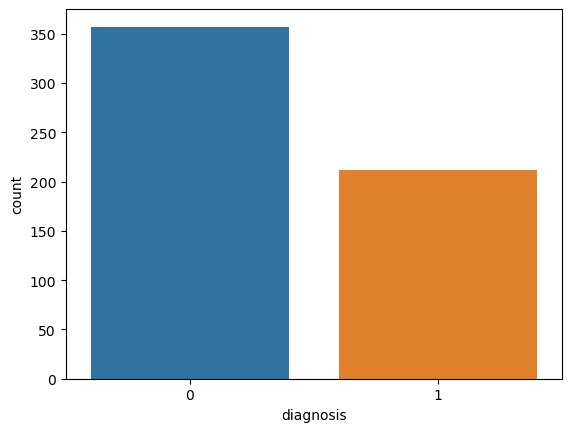

In [25]:
sns.countplot( data= df_data_processing, x='diagnosis')

#### the diagnosis variable is unbalanced but we have too little data to make a subsample

## Split and Scaling

In [140]:
X = df_data_processing.drop('diagnosis',axis=1)
y = df_data_processing.diagnosis.values

In [141]:
##split 
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

In [142]:
#Scaling 
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test)

In [143]:
##tarin model
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Test the model 

In [144]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.9385964912280702


## Confusion Matrix

<Figure size 1100x1100 with 0 Axes>

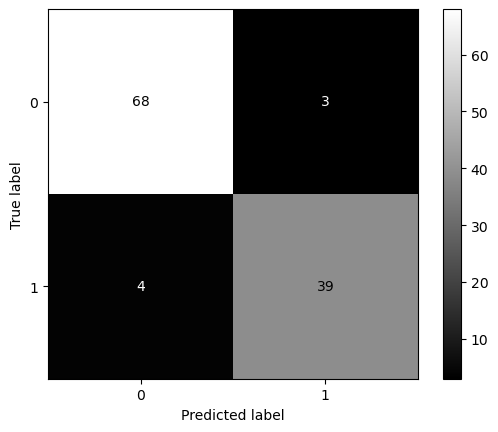

In [153]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= model.classes_)
disp.plot(cmap='gray')
plt.show()

<Figure size 1100x1100 with 0 Axes>

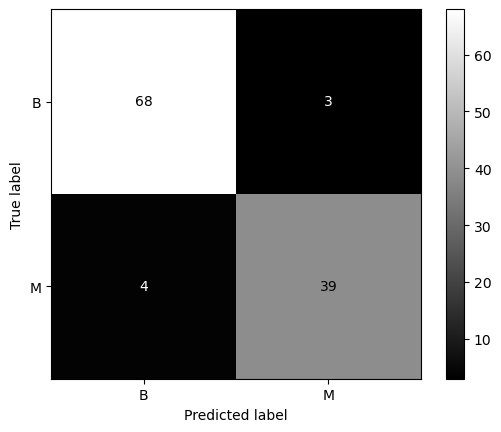

In [154]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['B','M'])
disp.plot(cmap='gray')
plt.show()

In [132]:
# The porba
model.predict_proba(X_test)

array([[9.00734860e-01, 9.92651397e-02],
       [6.21815330e-03, 9.93781847e-01],
       [2.13332819e-02, 9.78666718e-01],
       [9.75328948e-01, 2.46710517e-02],
       [9.94914501e-01, 5.08549928e-03],
       [1.66560531e-07, 9.99999833e-01],
       [1.92497775e-06, 9.99998075e-01],
       [1.12904965e-01, 8.87095035e-01],
       [6.98280279e-01, 3.01719721e-01],
       [9.94308514e-01, 5.69148601e-03],
       [8.30685277e-01, 1.69314723e-01],
       [1.12903767e-01, 8.87096233e-01],
       [9.25617871e-01, 7.43821294e-02],
       [5.89545512e-03, 9.94104545e-01],
       [9.96415631e-01, 3.58436912e-03],
       [1.19785793e-05, 9.99988021e-01],
       [9.68619350e-01, 3.13806495e-02],
       [9.94771707e-01, 5.22829283e-03],
       [9.99849627e-01, 1.50372764e-04],
       [2.26727098e-05, 9.99977327e-01],
       [9.10512476e-01, 8.94875237e-02],
       [9.47100921e-01, 5.28990792e-02],
       [6.84642044e-07, 9.99999315e-01],
       [9.98420322e-01, 1.57967800e-03],
       [9.773716

Axes(0.125,0.11;0.775x0.77)


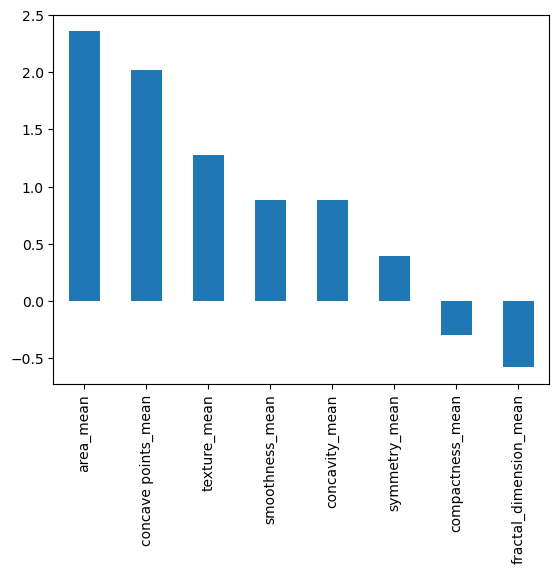

In [134]:
# weight of variables
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:8].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


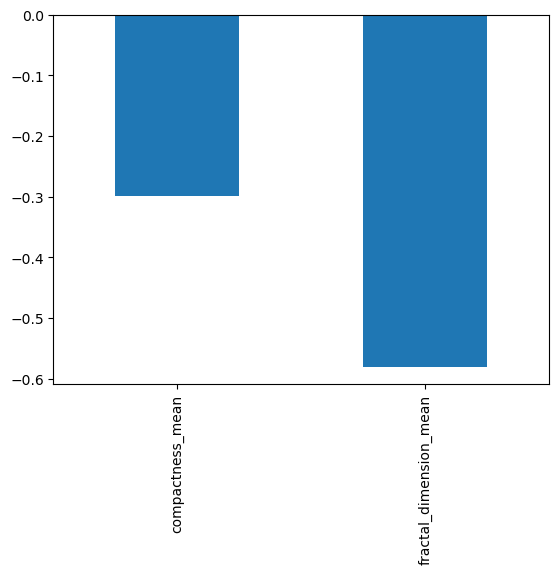

In [137]:
print(weights.sort_values(ascending=False)[-2:].plot(kind='bar'))